In [7]:
import scipy
from imageio import imread
import matplotlib.pyplot as plt
%matplotlib inline # seems to stop select working
from skimage.color import rgb2hsv
import numpy as np


In [2]:
import os
from imageio import imread

# Screenshots folder
F = "/Users/fintan/Dropbox/City/Gözde-Fintan/screenshots-Fintan/"

images = os.listdir(F)

In [3]:
# Check image names

images

['77.PNG',
 '63.PNG',
 '62.PNG',
 '76.PNG',
 '60.PNG',
 '74.PNG',
 '48.PNG',
 '49.PNG',
 '75.PNG',
 '61.PNG',
 '59.PNG',
 '65.PNG',
 '71.PNG',
 '70.PNG',
 '64.PNG',
 '58.PNG',
 '8.PNG',
 '72.PNG',
 '66.PNG',
 '67.PNG',
 '73.PNG',
 '9.PNG',
 '14.PNG',
 '28.PNG',
 '29.PNG',
 '15.PNG',
 '17.PNG',
 '16.PNG',
 '12.PNG',
 '13.PNG',
 '39.PNG',
 '11.PNG',
 '10.PNG',
 '38.PNG',
 '35.PNG',
 '21.PNG',
 '20.PNG',
 '34.PNG',
 '22.PNG',
 '36.PNG',
 '37.PNG',
 '23.PNG',
 '27.PNG',
 '33.PNG',
 '32.PNG',
 '26.PNG',
 '18.PNG',
 '30.PNG',
 '24.PNG',
 '25.PNG',
 '31.PNG',
 '19.PNG',
 '81.PNG',
 '4.PNG',
 '56.PNG',
 '42.PNG',
 '43.PNG',
 '5.PNG',
 '57.PNG',
 '80.PNG',
 '82.PNG',
 '41.PNG',
 '55.PNG',
 '7.PNG',
 '69.PNG',
 '68.PNG',
 '54.PNG',
 '6.PNG',
 '40.PNG',
 '83.PNG',
 '87.PNG',
 '78.PNG',
 '44.PNG',
 '2.PNG',
 '50.PNG',
 '3.PNG',
 '51.PNG',
 '45.PNG',
 '79.PNG',
 '86.PNG',
 '84.PNG',
 '53.PNG',
 '1.PNG',
 '47.PNG',
 '46.PNG',
 '52.PNG',
 '85.PNG']

In [4]:
# Load image 1

f = images[0]

p = F+ f

I = imread(p)

In [5]:
plt.imshow(I)

NameError: name 'plt' is not defined

In [23]:
# Function to extract the centre and the square 
#(don't have to extract the whole square, just a sample of it, as it's all the same colour)

def centre(I):
  I2 = np.copy(I)
  I2
  patch = I[150:300,540:690]
  square = I[200:250,590:640]
  return patch,square

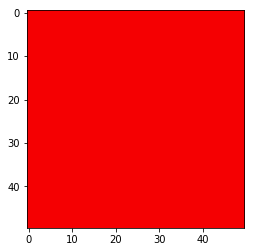

In [24]:
patch, square = centre(I)

plt.imshow(square)

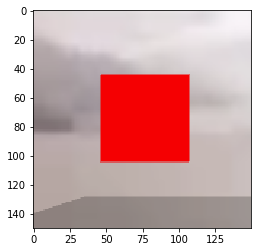

In [25]:
plt.imshow(patch)

In [31]:
# Drop alpha channel and convert to HSV
patch = patch[:,:,:3]
square = square[:,:,:3]
patch_hsv = rgb2hsv(patch)
square_hsv = rgb2hsv(square)

In [32]:
patch.shape

(150, 150, 3)

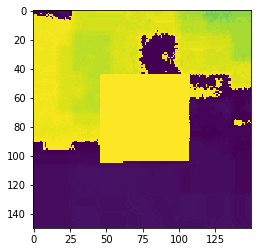

In [33]:
plt.imshow(patch_hsv[:,:,0])

In [34]:
# Means in each hsv channel

h1 = np.mean(patch_hsv[:,:,0])
s1 = np.mean(patch_hsv[:,:,1])
v1 = np.mean(patch_hsv[:,:,2])

h2 = np.mean(square_hsv[:,:,0])
s2 = np.mean(square_hsv[:,:,1])
v2 = np.mean(square_hsv[:,:,2])


In [35]:
# Differences
dh = h1 - h2
ds = s1 - s2
dv = v1 - v2

In [36]:
print(f"Hue {h1}, {h2} distance {dh}")
print(f"Saturation {s1}, {s2} distance {ds}")
print(f"Value {v1}, {v2} distance {dv}")

Hue 0.5321600785028685, 0.9986394557823128 distance -0.46647937727944433
Saturation 0.21688042140842306, 1.0 distance -0.783119578591577
Value 0.7865047494553378, 0.9607843137254902 distance -0.17427956427015245


In [81]:
hsv_distance = np.sqrt( (h1-h2)**2 + (s1-s2)**2 + (v1-v2)**2)
print(hsv_distance)

0.9280369875832868


In [37]:
# Same for RGB
r1 = np.mean(patch[:,:,0])
g1 = np.mean(patch[:,:,1])
b1 = np.mean(patch[:,:,2])

r2 = np.mean(square[:,:,0])
g2 = np.mean(square[:,:,1])
b2 = np.mean(square[:,:,2])

dr = r1 - r2
dg = g1 - g2
db = b1 - b2

print(f"Red {r1}, {r2} distance {dr}")
print(f"Green {g1}, {g2} distance {dg}")
print(f"Blue {b1}, {b2} distance {db}")

Red 200.55595555555556, 245.0 distance -44.444044444444444
Green 152.15106666666668, 0.0 distance 152.15106666666668
Blue 152.39022222222223, 2.0 distance 150.39022222222223


In [38]:
rgb_distance = np.sqrt( (r1-r2)**2 + (g1-g2)**2 + (b1-b2)**2)
print(rgb_distance)

218.50043275571238


In [7]:
# Tried this - did not seem to work
#https://medium.com/@khandelwalprateek01/how-to-select-roi-in-jupyter-notebook-309fe5185a54

import matplotlib.pyplot as plt
import IPython.display as Disp
from ipywidgets import widgets
import numpy as np
import cv2



In [8]:
class bbox_select():
    %matplotlib notebook 


    def __init__(self,im):
        self.im = im
        self.selected_points = []
        self.fig,ax = plt.subplots()
        self.img = ax.imshow(self.im.copy())
        self.ka = self.fig.canvas.mpl_connect('button_press_event', self.onclick)
        disconnect_button = widgets.Button(description="Disconnect mpl")
        Disp.display(disconnect_button)
        disconnect_button.on_click(self.disconnect_mpl)


        
    def poly_img(self,img,pts):
        pts = np.array(pts, np.int32)
        pts = pts.reshape((-1,1,2))
        cv2.polylines(img,[pts],True,(np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)),7)
        return img

    def onclick(self, event):
    #display(str(event))
        self.selected_points.append([event.xdata,event.ydata])
        if len(self.selected_points)>1:
            self.fig
            self.img.set_data(self.poly_img(self.im.copy(),self.selected_points))
    def disconnect_mpl(self,_):
        self.fig.canvas.mpl_disconnect(self.ka)

<IPython.core.display.Javascript object>


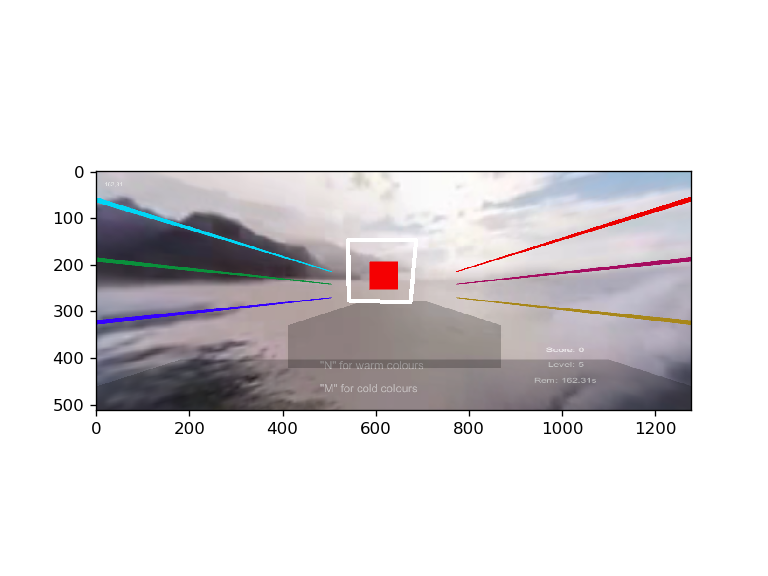

Button(description='Disconnect mpl', style=ButtonStyle())

In [9]:


bs = bbox_select(I)

